# Agrupamento com Expectation-Maximization

O Expectation-Maximization (EM) é usado para modelar dados não rotulados e é especialmente útil quando os dados possuem distribuições ocultas. O objetivo do EM é encontrar os parâmetros de um modelo de mistura de distribuições probabilísticas que melhor descrevem os dados.

O funcionamento básico do algoritmo Expectation-Maximization é o seguinte:

1. Inicializa os parâmetros do modelo de mistura de forma aleatória ou usando alguma heurística.
2. Passo de Expectation (E-step): Calcula a probabilidade de cada ponto de dados pertencer a cada componente da mistura (responsabilidades).
3. Passo de Maximization (M-step): Atualiza os parâmetros do modelo para maximizar a probabilidade conjunta dos dados e das 4. responsabilidades calculadas no passo anterior.
4. Repete os passos 2 e 3 até que os parâmetros converjam ou até que um critério de parada seja atingido.

## Configuração de dados

In [1]:
# Importando biblioteca pandas
import pandas as pd

# Importando classe MinMaxScaler da biblioteca scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Importando dados
df = pd.read_csv('dados/diabetes.csv')

for coluna in df.columns:
    
    # Calculando mediana
    mediana_coluna = df[coluna].median()
    
    # Substitui os valores nulos pela mediana da coluna usando loc
    df.loc[df[coluna].isnull(), coluna] = mediana_coluna

    # Normalizando dados
    df[coluna] = MinMaxScaler().fit_transform(df[[coluna]])

# Visualizando dados
df.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.269183,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.150672,0.166667
2,0.470588,0.919598,0.524590,0.232323,0.0,0.347243,0.288505,0.183333


## Agrupamento de dados

In [2]:
# Importando a classe GaussianMixture do módulo misture da biblioteca scikit-learn
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(
                n_components=2, # número de clusters desejado (neste caso, 2)
                covariance_type='spherical') # Tipo de covariância (nesse caso, esférica)

# Aplicando o algoritmo GMM aos dados do DataFrame
gmm.fit(df)

GaussianMixture(covariance_type='spherical', n_components=2)

Além do spherical, os outros tipos de covariância são:

1. 'tied': Neste caso, todas as componentes do modelo compartilham a mesma matriz de covariância, que é uma matriz completa e simétrica. Isso significa que todas as variáveis têm a mesma covariância entre si.

2. 'diag': Neste caso, cada componente tem sua própria matriz diagonal de covariância, o que significa que as variáveis são consideradas independentes umas das outras, exceto pela sua variância. Ou seja, a covariância entre diferentes dimensões é zero.

3. 'full': Neste caso, cada componente do modelo tem sua própria matriz completa e simétrica de covariância. Isso significa que não há restrições nas covariâncias entre as diferentes variáveis, permitindo correlações arbitrárias entre elas.

Em alguns casos, a escolha deles podem afetar significativamente o agrupamento dos dados.

## Visualização de Dados 2D

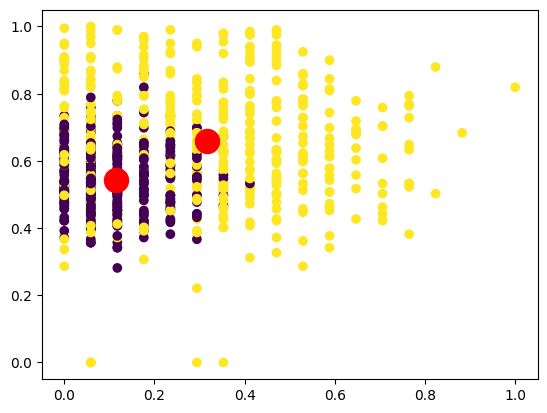

In [3]:
# Importando a biblioteca matplotlib para visualização de dados
import matplotlib.pyplot as plt

# Obtendo as coordenadas dos centróides dos clusters encontrados pelo GMM
centroids = gmm.means_

# Criando um gráfico de dispersão 2D dos dados
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=gmm.predict(df), cmap='viridis')  # Plot dos dados com cores de acordo com os clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300)  # Plot dos centróides em vermelho

# Exibindo o gráfico
plt.show()

## Visualização de Dados 3D

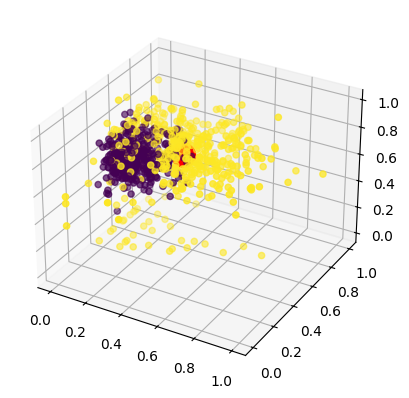

In [4]:
# Importando a classe Axes3D do módulo mpl_toolkits.mplot3d para plotagem em 3D
from mpl_toolkits.mplot3d import Axes3D

# Criando uma figura 3D
fig = plt.figure()

# Adicionando um subplot 3D à figura
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos tridimensionais dos dados com cores de acordo com os clusters
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=gmm.predict(df), cmap='viridis')

# Plotando os centróides tridimensionais dos clusters em vermelho
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=300)

# Visualizando dados agrupados em volta de centróide em gráfico 3d
plt.show()

## Considerações Finais

Como pode ser visto nos gráficos 2D e 3D, após o agrupamento, os dados tendem a se concentrar em volta dos centróides que são dois, visto que correspondem ao número de clusters especificado.